# A.Datos abiertos de la CDMX

In [1]:
#librerías
import pandas as pd
import numpy as np 
import random
from sklearn.model_selection import train_test_split
import re
import warnings
import unicodedata
warnings.filterwarnings("ignore")
import datetime
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
#Leyendo los datos desde drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Opi Analitycs/'
df= pd.read_csv(path + 'carpetas_completa_julio_2021.csv')

Mounted at /content/drive


In [3]:
#Revisando datos
df.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN


## 1 
¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas, sólo describe la prueba y lo que te dice cada una.

Las pruebas que haría serían ver el tamaño de los datos, la distribución de datos continuos, conteos de categoricos, ver si hay datos faltantes o cpletitud de los datos que pudieran sesgar el analisis, existencia de datos raros y corregirlos, revisar y eliminar registros duplicados 

In [4]:
df.shape

(1268638, 19)

In [5]:
df.columns

Index(['ao_hechos', 'mes_hechos', 'fecha_hechos', 'ao_inicio', 'mes_inicio',
       'fecha_inicio', 'delito', 'fiscalia', 'agencia', 'unidad_investigacion',
       'categoria_delito', 'calle_hechos', 'calle_hechos2', 'colonia_hechos',
       'alcaldia_hechos', 'competencia', 'longitud', 'latitud', 'tempo'],
      dtype='object')

In [6]:
pd.DataFrame(df.dtypes)

,0
ao_hechos,float64
mes_hechos,object
fecha_hechos,object
ao_inicio,int64
mes_inicio,object
fecha_inicio,object
delito,object
fiscalia,object
agencia,object
unidad_investigacion,object


In [7]:
variables=list(df.columns)

In [8]:
#REvisando los valores de las variables
#estadisticos descriptivos
print(df.describe())
#valores unicos
for var in variables:
    print(var,df[var].unique())

          ao_hechos     ao_inicio      longitud       latitud  tempo
count  1.268202e+06  1.268638e+06  1.217271e+06  1.217271e+06    0.0
mean   2.018189e+03  2.018341e+03 -9.913721e+01  1.938723e+01    NaN
std    1.875047e+00  1.571532e+00  5.994630e-02  6.996396e-02    NaN
min    1.906000e+03  2.016000e+03 -1.002319e+02  1.909535e+01    NaN
25%    2.017000e+03  2.017000e+03 -9.917558e+01  1.933955e+01    NaN
50%    2.018000e+03  2.018000e+03 -9.914210e+01  1.938976e+01    NaN
75%    2.020000e+03  2.020000e+03 -9.909967e+01  1.943771e+01    NaN
max    2.021000e+03  2.021000e+03 -9.894686e+01  1.958333e+01    NaN
ao_hechos [2016. 2015. 2012. 2014. 2011. 2008. 2006. 2010. 2013. 2005. 2009.   nan
 1955. 2004. 2002. 1998. 1997. 1965. 2007. 2000. 1987. 1999. 1956. 2001.
 1996. 1986. 1915. 1988. 2017. 2003. 1991. 1993. 1977. 1984. 1995. 1994.
 1990. 1992. 1978. 1989. 1972. 2018. 2019. 1974. 1970. 1980. 1976. 1983.
 1985. 1966. 1969. 1981. 1960. 1982. 1975. 1954. 1973. 1964. 1968. 1963.
 197

In [9]:
#Corrigiendo valores mal redactados
di = {'November':'Noviembre','Mayo-2018':'Mayo','May':'Mayo','Agosto-2017':'Agosto','agosto3':'Agosto','Diciiembre':'Diciembre','Maro':'Marzo','Novembre':'Noviembre','Septiemb':'Septiembre',
      'Novimbre':'Noviembre','Septiemb':'Septiembre','ENRO':'Enero','January':'Enero','February':'Febrero','March':'Marzo','April':'Abril','abrill':'Abril','June':'Junio','July':'Julio','August':'Agosto','Agossto':'Agosto',
      'September':'Septiembre','October':'Octubre','December':'Diciembre','Aabril':'Abril','Febrero-2015':'Febrero','Julio .':'Julio'}
df.replace({'mes_hechos':di},inplace=True)    

In [10]:
#verificando si se corrigieron
for var in variables:
    print(var,df[var].unique())

ao_hechos [2016. 2015. 2012. 2014. 2011. 2008. 2006. 2010. 2013. 2005. 2009.   nan
 1955. 2004. 2002. 1998. 1997. 1965. 2007. 2000. 1987. 1999. 1956. 2001.
 1996. 1986. 1915. 1988. 2017. 2003. 1991. 1993. 1977. 1984. 1995. 1994.
 1990. 1992. 1978. 1989. 1972. 2018. 2019. 1974. 1970. 1980. 1976. 1983.
 1985. 1966. 1969. 1981. 1960. 1982. 1975. 1954. 1973. 1964. 1968. 1963.
 1971. 1958. 1942. 1930. 1979. 1906. 1962. 1957. 2020. 1950. 1952. 2021.
 1967.]
mes_hechos ['Enero' 'Febrero' 'Diciembre' 'Agosto' 'Noviembre' 'Abril' 'Octubre'
 'Septiembre' 'Junio' 'Mayo' 'Julio' 'Marzo' nan]
fecha_hechos ['2016-01-31 22:16:00' '2016-01-31 20:50:00' '2016-02-01 00:30:00' ...
 '2021-07-26 13:35:00' '2021-07-31 23:00:00' '2021-07-30 18:22:00']
ao_inicio [2016 2017 2018 2019 2020 2021]
mes_inicio ['Febrero' 'Enero' 'Marzo' 'Junio' 'Agosto' 'Mayo' 'Septiembre' 'Octubre'
 'Noviembre' 'Diciembre' 'Abril' 'Julio']
fecha_inicio ['2016-02-01 00:25:44' '2016-02-01 00:52:37' '2016-02-01 01:33:26' ...
 '2021-0

In [11]:
#Dadno formatos de fecha 
df['fecha_hechos']=pd.to_datetime(df['fecha_hechos'],errors='coerce')
df['fecha_inicio']=pd.to_datetime(df['fecha_inicio'],errors='coerce')

In [12]:
#Corrigiendo valores extraños
df['longitud']=np.where(df['longitud'].fillna('-999').str.contains(r'[a-zA-Z@#&$%+]'),'-999',df['longitud'])
df['longitud']=df['longitud'].replace("--",'-999')
df['longitud']=df['longitud'].replace('."','-999')
df['longitud']=df['longitud'].astype(float)

In [13]:
#Agrupando y renombrando las vairbales por tipo: coordenadas, fechas y texto
c_feats=['longitud','latitud']
d_feats=['fecha_hechos','fecha_inicio']
t_feats=['delito','categoria_delito','fiscalia','agencia','unidad_investigacion','colonia_hechos','alcaldia_hechos','mes_inicio','mes_hechos','calle_hechos','calle_hechos2','geopoint']

c_feats_new=["c_"+x for x in c_feats]
d_feats_new=["d_"+x for x in d_feats]
t_feats_new=["t_"+x for x in t_feats]

df.rename(columns=dict(zip(d_feats,d_feats_new)),inplace=True)
df.rename(columns=dict(zip(t_feats,t_feats_new)),inplace=True)
df.rename(columns=dict(zip(c_feats,c_feats_new)),inplace=True)

In [14]:
#revisar duplicados
df[df.duplicated()]

,ao_hechos,t_mes_hechos,d_fecha_hechos,ao_inicio,t_mes_inicio,d_fecha_inicio,t_delito,t_fiscalia,t_agencia,t_unidad_investigacion,t_categoria_delito,t_calle_hechos,t_calle_hechos2,t_colonia_hechos,t_alcaldia_hechos,competencia,c_longitud,c_latitud,tempo


In [15]:
#Total de registros duplicados
df.duplicated().sum()


0

In [16]:
#revisando existencia de datos nulos, completitud de los datos
comple=pd.DataFrame(df.isnull().sum())
comple.reset_index(inplace=True)
#conteo
comple=comple.rename(columns={"index":"columna",0:"total"})
#porcentaje
comple["completitud"]=(1-comple["total"]/df.shape[0])*100
#ordenando incompletos
comple=comple.sort_values(by="completitud",ascending=True)
comple.reset_index(drop=True,inplace=True)
comple

,columna,total,completitud
0,tempo,1268638,0.000000
1,competencia,1064079,16.124300
2,t_calle_hechos2,774447,38.954454
3,t_colonia_hechos,52324,95.875577
4,c_longitud,51367,95.951012
5,c_latitud,51367,95.951012
6,t_alcaldia_hechos,3588,99.717177
7,t_calle_hechos,3182,99.749180
8,ao_hechos,436,99.965632
9,d_fecha_hechos,436,99.965632


In [17]:
#elimnando registros con demasiados flatantes
df.drop(columns=["t_calle_hechos2", "tempo","competencia"],inplace=True)

In [18]:
df.head(3)

,ao_hechos,t_mes_hechos,d_fecha_hechos,ao_inicio,t_mes_inicio,d_fecha_inicio,t_delito,t_fiscalia,t_agencia,t_unidad_investigacion,t_categoria_delito,t_calle_hechos,t_colonia_hechos,t_alcaldia_hechos,c_longitud,c_latitud
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,AMÉRICAS UNIDAS,BENITO JUAREZ,-999.0,19.380315
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,LOS CIPRESES,IZTAPALAPA,-999.0,19.352859
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,UNIDAD VICENTE GUERRERO,IZTAPALAPA,-999.0,19.356451


In [19]:
#verificar las coordenadas
df.filter(like="c_").describe()

,c_longitud,c_latitud
count,1217271.0,1.217271e+06
mean,-999.0,1.938723e+01
std,0.0,6.996396e-02
min,-999.0,1.909535e+01
25%,-999.0,1.933955e+01
50%,-999.0,1.938976e+01
75%,-999.0,1.943771e+01
max,-999.0,1.958333e+01


Los registros no cumplen con la condición de latitud -90 a 90, y de longitud de entre -180 y 180, por lo que no se podría graficar

In [20]:
#distribución del año
pd.DataFrame(df['ao_hechos'].describe())

,ao_hechos
count,1.268202e+06
mean,2.018189e+03
std,1.875047e+00
min,1.906000e+03
25%,2.017000e+03
50%,2.018000e+03
75%,2.020000e+03
max,2.021000e+03


In [21]:
df.head()

,ao_hechos,t_mes_hechos,d_fecha_hechos,ao_inicio,t_mes_inicio,d_fecha_inicio,t_delito,t_fiscalia,t_agencia,t_unidad_investigacion,t_categoria_delito,t_calle_hechos,t_colonia_hechos,t_alcaldia_hechos,c_longitud,c_latitud
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,AMÉRICAS UNIDAS,BENITO JUAREZ,-999.0,19.380315
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,LOS CIPRESES,IZTAPALAPA,-999.0,19.352859
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,UNIDAD VICENTE GUERRERO,IZTAPALAPA,-999.0,19.356451
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,EMILIANO ZAPATA,IZTAPALAPA,-999.0,19.331633
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,DEL VALLE CENTRO,BENITO JUAREZ,-999.0,19.387114


In [22]:
#Revisando las varibales de texto
df.filter(like="t_").describe()

,t_mes_hechos,t_mes_inicio,t_delito,t_fiscalia,t_agencia,t_unidad_investigacion,t_categoria_delito,t_calle_hechos,t_colonia_hechos,t_alcaldia_hechos
count,1268202,1268638,1268638,1268636,1268638,1268411,1268638,1265456,1216314,1265050
unique,12,12,345,73,180,129,18,261030,1664,551
top,Marzo,Marzo,VIOLENCIA FAMILIAR,INVESTIGACIÓN EN IZTAPALAPA,CUH-2,UI-1SD,DELITO DE BAJO IMPACTO,CALZADA DE TLALPAN,CENTRO,CUAUHTEMOC
freq,118447,119572,131898,114947,44521,327986,993249,5352,41382,197609


In [23]:
t_var=list(df.filter(like="t_").columns)

## 2 
Identifica los delitos que van a la alza y a la baja en la CDMX

De los delitos que van a la baja se encuentran:


*   ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO
*   ROBO DE OBJETOS
*   ROBO DE ACCESORIOS DE AUTO
*   ROBO DE DOCUMENTOS
*   ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
*   ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA
*   ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA
*   LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION
*   DAÑO EN PROPIEDAD AJENA INTENCIONAL
*   DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A BIENES INMUEBLES
*   CONTRA FUNCIONARIOS PUBLICOS

La cual en general es más notorio el descenso en los últimos 2 años (2020 y 2021)



Y de los que van a la alta son:


*   ROBO DE OBJETOS A ESCUELA
*   ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VIOLENCIA
*   ROBO EN NEGOCIO CON VIOLENCIA

Los cuales la tendencia se nota más en los años 2019, 2020, 2021.





El resto de los delitos si son con pocas ocurrencias tienden a subir y bajar intermitentemente dentro de un rango; asimismo, la mayoría de los que tienen más altas ocurrencias tienden a subir y luego bajar, presentando un pico enntre 2018 y 2019.

In [24]:
df.columns

Index(['ao_hechos', 't_mes_hechos', 'd_fecha_hechos', 'ao_inicio',
       't_mes_inicio', 'd_fecha_inicio', 't_delito', 't_fiscalia', 't_agencia',
       't_unidad_investigacion', 't_categoria_delito', 't_calle_hechos',
       't_colonia_hechos', 't_alcaldia_hechos', 'c_longitud', 'c_latitud'],
      dtype='object')

In [25]:
#delitos despues del 2016, porque antes son pocos los esxistentes y hay fechas no validas anteriores a esta 
df_2016=df[df['ao_hechos']>=2016]

In [26]:
ConteoDelitos=df_2016.groupby(['t_delito','ao_hechos']).agg({'t_alcaldia_hechos':'count'})#
ConteoDelitos=ConteoDelitos.sort_values(by=["t_delito",'ao_hechos'],ascending=True)
print(ConteoDelitos)

                               t_alcaldia_hechos
t_delito            ao_hechos                   
ABANDONO DE PERSONA 2016.0                   615
                    2017.0                   666
                    2018.0                   566
ABORTO              2016.0                   115
                    2017.0                    82
...                                          ...
VIOLENCIA FAMILIAR  2017.0                 18572
                    2018.0                 20015
                    2019.0                 25967
                    2020.0                 28222
                    2021.0                 19261

[1660 rows x 1 columns]


In [27]:
range(len(ConteoDelitos))

range(0, 1660)

In [28]:
#Imprimiendo todos los resultados por delito
for i in range(len(ConteoDelitos)):
  print(ConteoDelitos.iloc[i,:])

t_alcaldia_hechos    615
Name: (ABANDONO DE PERSONA, 2016.0), dtype: int64
t_alcaldia_hechos    666
Name: (ABANDONO DE PERSONA, 2017.0), dtype: int64
t_alcaldia_hechos    566
Name: (ABANDONO DE PERSONA, 2018.0), dtype: int64
t_alcaldia_hechos    115
Name: (ABORTO, 2016.0), dtype: int64
t_alcaldia_hechos    82
Name: (ABORTO, 2017.0), dtype: int64
t_alcaldia_hechos    112
Name: (ABORTO, 2018.0), dtype: int64
t_alcaldia_hechos    133
Name: (ABORTO, 2019.0), dtype: int64
t_alcaldia_hechos    83
Name: (ABORTO, 2020.0), dtype: int64
t_alcaldia_hechos    48
Name: (ABORTO, 2021.0), dtype: int64
t_alcaldia_hechos    1237
Name: (ABUSO DE AUTORIDAD, 2016.0), dtype: int64
t_alcaldia_hechos    1289
Name: (ABUSO DE AUTORIDAD, 2017.0), dtype: int64
t_alcaldia_hechos    1679
Name: (ABUSO DE AUTORIDAD, 2018.0), dtype: int64
t_alcaldia_hechos    4
Name: (ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA, 2016.0), dtype: int64
t_alcaldia_hechos    13
Name: (ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA

## 3 
¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?¿Por qué crees que sea
esto?

LA que tiene menos es la alcaldia Cuauhtemoc y la que tiene menos es la Milpa Alta, podría deberse a que en la primera se encuentra la zona centro que es muy concurrida por personas y es donde suelen ocurrir muchos de los delitos que se reportan, en contraste con la Milpa alta que es la menos poblada y la más aislada, donde hay menos población y por ende menos delitos reportados.

In [29]:
ConteoAlcaldia=df_2016.groupby(['t_alcaldia_hechos']).agg({'t_delito':'count'})#

In [30]:
ConteoAlcaldia=ConteoAlcaldia.sort_values(by="t_delito",ascending=False)
ConteoAlcaldia.head(16)

,t_delito
t_alcaldia_hechos,
CUAUHTEMOC,189392
IZTAPALAPA,187590
GUSTAVO A MADERO,125064
BENITO JUAREZ,101870
ALVARO OBREGON,84815
COYOACAN,83085
MIGUEL HIDALGO,80291
TLALPAN,72893
VENUSTIANO CARRANZA,71717


In [31]:
AlcaldiasCDMX=list(ConteoAlcaldia.index[1:16])
AlcaldiasCDMX

['IZTAPALAPA',
 'GUSTAVO A MADERO',
 'BENITO JUAREZ',
 'ALVARO OBREGON',
 'COYOACAN',
 'MIGUEL HIDALGO',
 'TLALPAN',
 'VENUSTIANO CARRANZA',
 'AZCAPOTZALCO',
 'IZTACALCO',
 'XOCHIMILCO',
 'TLAHUAC',
 'LA MAGDALENA CONTRERAS',
 'CUAJIMALPA DE MORELOS',
 'MILPA ALTA']

In [32]:
df_2016['unos']=1
tabla_delitos= pd.pivot_table(df_2016, values='unos', index=['ao_hechos'],
                    columns=['t_alcaldia_hechos'], aggfunc=np.sum)
tabla_delitos

t_alcaldia_hechos,ABALA,ACAMBARO,ACAMBAY,ACAPULCO DE JUAREZ,ACATLAN,ACATZINGO,ACAXOCHITLAN,ACAYUCAN,ACOLMAN,ACONCHI,ACTOPAN,ACUAMANALA DE MIGUEL HIDALGO,ACULCO,AGUA PRIETA,AGUASCALIENTES,AHOME,AHUATLAN,AHUEHUETITLA,AHUMADA,ALFAJAYUCAN,ALLENDE,ALMOLOYA DE ALQUISIRAS,ALMOLOYA DE JUAREZ,ALMOLOYA DEL RIO,ALPATLAHUAC,ALTAMIRA,ALTO LUCERO DE GUTIERREZ BARRIOS,ALVARADO,ALVARO OBREGON,AMANALCO,AMATENANGO DEL VALLE,AMAXAC DE GUERRERO,AMEALCO DE BONFIL,AMECAMECA,AMOZOC,APAN,APASEO EL GRANDE,APATZINGAN,APAXCO,APETATITLAN DE ANTONIO CARVAJAL,...,VALLE HERMOSO,VENUSTIANO CARRANZA,VERACRUZ,VICTORIA,VILLA DE ALLENDE,VILLA DE ZAACHILA,VILLA DEL CARBON,VILLA VICTORIA,VILLAHERMOSA O CENTRO,XALAPA,XALATLACO,XICO,XICOTEPEC,XOCHICOATLAN,XOCHIMILCO,XOCHITEPEC,XONACATLAN,YAUHQUEMECAN,YAUTEPEC,YECAPIXTLA,YEHUALTEPEC,YURIRIA,ZACAPOAXTLA,ZACAPU,ZACATECAS,ZACATELCO,ZACATLAN,ZAMORA,ZAPOPAN,ZAPOTITLAN PALMAS,ZAPOTLAN DE JUAREZ,ZAPOTLAN EL GRANDE,ZAUTLA,ZEMPOALA,ZIHUATANEJO DE AZUETA,ZINACANTEPEC,ZINAPECUARO,ZITACUARO,ZITLALTEPEC DE TRINIDAD SANCHEZ SANTOS,ZUMPANGO
ao_hechos,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016.0,1.0,NaN,1.0,6.0,NaN,1.0,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,12336.0,1.0,NaN,NaN,4.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,10864.0,4.0,4.0,NaN,1.0,NaN,NaN,5.0,4.0,1.0,NaN,NaN,NaN,6196.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,4.0,1.0,1.0,1.0,7.0,NaN,1.0,NaN,2.0,1.0,3.0,1.0,NaN,1.0,NaN,7.0
2017.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,14350.0,NaN,NaN,1.0,2.0,2.0,NaN,1.0,1.0,1.0,NaN,NaN,...,NaN,12781.0,4.0,3.0,NaN,1.0,1.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,6888.0,2.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,3.0,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,1.0,NaN,6.0
2018.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,16702.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,15081.0,5.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,7567.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2019.0,NaN,1.0,2.0,21.0,NaN,NaN,1.0,1.0,5.0,1.0,1.0,1.0,1.0,NaN,7.0,1.0,NaN,NaN,NaN,1.0,3.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN,17948.0,NaN,1.0,NaN,1.0,7.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,14475.0,11.0,1.0,2.0,NaN,1.0,2.0,3.0,2.0,13.0,1.0,1.0,1.0,7385.0,2.0,1.0,1.0,4.0,1.0,1.0,NaN,NaN,NaN,2.0,1.0,NaN,1.0,5.0,NaN,NaN,1.0,NaN,NaN,2.0,2.0,1.0,NaN,NaN,18.0
2020.0,NaN,2.0,1.0,16.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1.0,3.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,14720.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,...,NaN,11654.0,15.0,1.0,2.0,NaN,1.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,6953.0,1.0,NaN,1.0,4.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,6.0,1.0,NaN,NaN,NaN,1.0,2.0,4.0,NaN,1.0,1.0,9.0
2021.0,NaN,NaN,NaN,12.0,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,8759.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,6862.0,3.0,1.0,1.0,NaN,NaN,2.0,2.0,NaN,1.0,NaN,NaN,NaN,4137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


## 4
¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas) en la CDMX?¿A qué crees que se deba?

Observando los resultados se puede percibir que existe una tendencia de ocurrencia se delitos, con una más alta prevalencia al inicio del año, los días viernes y los días de quincena 15 y 1 del mes; la cual quiza se pueda deber a la cuesta de enero (muchos pueden recurrir al robo), los dias viernes que puede ser cuando más personas salen a las calles despues del trabajo (más propension a robos y accidentes), los dias de quincena que es cuando les pagan a los empleados formales (robo en bancos, transeunte, etc).

In [33]:
#obtneiendo el dia de la smana
df_2016['week_num']=df_2016['d_fecha_hechos'].dt.dayofweek
df_2016['week_num'].unique()

array([6, 0, 2, 5, 3, 1, 4])

In [34]:
conds = [df_2016['week_num']==0,
         df_2016['week_num']==1,
         df_2016['week_num']==2,
         df_2016['week_num']==3,
          df_2016['week_num']==4,
          df_2016['week_num']==5,
           df_2016['week_num']==6]
choices=['Lunes','Martes','Miercoles','Jueves','Viernes','Sábado','Domingo']
df_2016['week_day'] = np.select(conds, choices,'NA')

In [35]:
R=df_2016.groupby(['week_day']).agg({'t_delito':'count'})
R.reset_index(inplace=True)
R

,week_day,t_delito
0,Domingo,146731
1,Jueves,182386
2,Lunes,185399
3,Martes,183819
4,Miercoles,185465
5,Sábado,162650
6,Viernes,192840


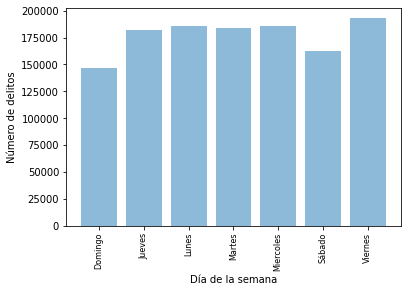

In [36]:
R=df_2016.groupby(by=['week_day']).agg({'t_delito':'count'})
R.reset_index(inplace=True)
plt.bar(R['week_day'],R['t_delito'], align='center', alpha=0.5)
plt.xticks(R['week_day'],fontsize=8,rotation=90)
plt.ylabel('Número de delitos')
plt.xlabel('Día de la semana')

plt.show()

In [37]:
#extrayendo el mes
df_2016['mes']=pd.DatetimeIndex(df_2016['d_fecha_hechos']).month
df_2016['mes'].unique()

array([ 1,  2,  3,  6,  5,  4,  8,  7, 12, 11, 10,  9])

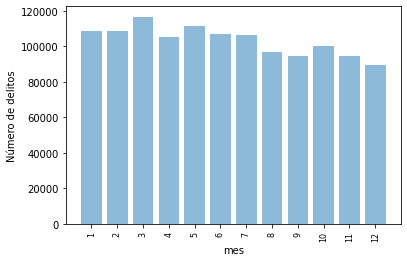

In [38]:
m=df_2016.groupby(by=['mes']).agg({'t_delito':'count'})
m.reset_index(inplace=True)
plt.bar(m['mes'],m['t_delito'], align='center', alpha=0.5)
plt.xticks(m['mes'],fontsize=8,rotation=90)
plt.ylabel('Número de delitos')
plt.xlabel('mes')
#plt.title('Concetrando por Colonia')

plt.show()

In [39]:
#cuatrimestre
conds = [df_2016['mes']<=4,
         (df_2016['mes']>=5)&(df_2016['mes']<=8),
         (df_2016['mes']>=9)&(df_2016['mes']<=12)]
choices=['C1','C2','C3']
df_2016['Cuatrimestres'] = np.select(conds, choices,'NA')

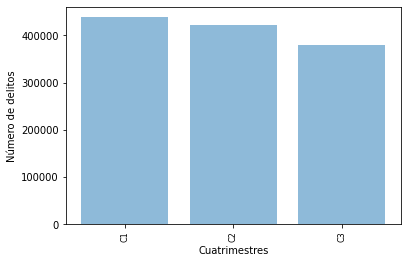

In [40]:
R=df_2016.groupby(by=['Cuatrimestres']).agg({'t_delito':'count'})
R.reset_index(inplace=True)
plt.bar(R['Cuatrimestres'],R['t_delito'], align='center', alpha=0.5)
plt.xticks(R['Cuatrimestres'],fontsize=8,rotation=90)
plt.ylabel('Número de delitos')
plt.xlabel('Cuatrimestres')
#plt.title('Concetrando por Colonia')

plt.show()

In [41]:
df_2016['dia']=pd.DatetimeIndex(df_2016['d_fecha_hechos']).day

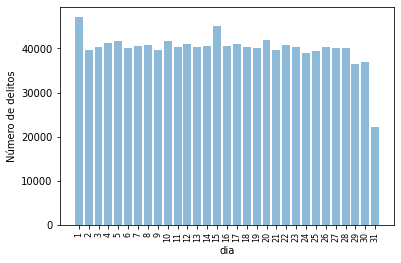

In [42]:
d=df_2016.groupby(by=['dia']).agg({'t_delito':'count'})
d.reset_index(inplace=True)
plt.bar(d['dia'],d['t_delito'], align='center', alpha=0.5)
plt.xticks(d['dia'],fontsize=8,rotation=90)
plt.ylabel('Número de delitos')
plt.xlabel('dia')
#plt.title('Concetrando por Colonia')

plt.show()

## 5 
¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

De los delitos que más caracterizan a cada alcaldía se tiene que son:
*  **Iztapalapa** son los delitos de bajo impacto, el HOMICIDIO DOLOSO, las LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO, el ROBO DE VEHÍCULO CON Y SIN VIOLENCIA, el ROBO A CASA HABITACIÓN CON VIOLENCIA, el ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA, el ROBO DE VEHÍCULO CON Y SIN VIOLENCIA, ROBO A REPARTIDOR CON Y SIN VIOLENCIA, el ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA, el ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA
*  **Venustiano Carranza** es el delito de ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA, 
* **Xochimilco** el PLAGIO O SECUESTRO
* **Miguel Hidalgo** el ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA


En el resto de las alcaldias no se presentan tipos de delitos que sean más frecuentes en estas respecto a las demas, por lo que no se han mencionado.

In [43]:
#obteneindo por alcaldia y tipo de dleito
tabla_delitos_alcaldia= pd.pivot_table(df_2016.loc[df_2016['t_alcaldia_hechos'].isin(AlcaldiasCDMX),:], values='unos', index=['t_categoria_delito'],
                    columns=['t_alcaldia_hechos'], aggfunc=np.sum)
tabla_delitos_alcaldia

t_alcaldia_hechos,ALVARO OBREGON,AZCAPOTZALCO,BENITO JUAREZ,COYOACAN,CUAJIMALPA DE MORELOS,GUSTAVO A MADERO,IZTACALCO,IZTAPALAPA,LA MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,TLAHUAC,TLALPAN,VENUSTIANO CARRANZA,XOCHIMILCO
t_categoria_delito,,,,,,,,,,,,,,,
DELITO DE BAJO IMPACTO,67505.0,48090.0,85721.0,67826.0,16321.0,94237.0,38784.0,137317.0,17307.0,62977.0,7582.0,23546.0,59904.0,53550.0,30056.0
FEMINICIDIO,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HECHO NO DELICTIVO,3425.0,1834.0,3556.0,3508.0,607.0,5466.0,2416.0,7970.0,777.0,2771.0,339.0,1000.0,2584.0,4730.0,1227.0
HOMICIDIO DOLOSO,483.0,254.0,130.0,246.0,62.0,1117.0,252.0,1520.0,105.0,269.0,72.0,304.0,510.0,560.0,269.0
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,649.0,287.0,319.0,272.0,45.0,1434.0,289.0,1776.0,87.0,444.0,41.0,278.0,424.0,741.0,142.0
PLAGIO O SECUESTRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
ROBO A CASA HABITACIÓN CON VIOLENCIA,298.0,180.0,155.0,174.0,77.0,373.0,107.0,513.0,123.0,173.0,23.0,131.0,295.0,167.0,167.0
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,165.0,136.0,227.0,145.0,22.0,295.0,122.0,286.0,14.0,312.0,6.0,42.0,87.0,140.0,36.0
ROBO A NEGOCIO CON VIOLENCIA,1741.0,1052.0,1262.0,964.0,144.0,2354.0,1068.0,3870.0,239.0,1924.0,51.0,661.0,945.0,1224.0,716.0


In [44]:
#Fila donde el delito es más frecuente
tabla_delitos_alcaldia.apply(np.argmax,1)

t_categoria_delito
DELITO DE BAJO IMPACTO                                      7
FEMINICIDIO                                                 0
HECHO NO DELICTIVO                                          7
HOMICIDIO DOLOSO                                            7
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO               7
PLAGIO O SECUESTRO                                         14
ROBO A CASA HABITACIÓN CON VIOLENCIA                        7
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA     9
ROBO A NEGOCIO CON VIOLENCIA                                7
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA     7
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA               7
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA      13
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                       7
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA        7
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                    7
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA               

In [45]:
#Alcaldía que presenta el delito más freceunte
tabla_delitos_alcaldia.columns[tabla_delitos_alcaldia.apply(np.argmax,1)]

Index(['IZTAPALAPA', 'ALVARO OBREGON', 'IZTAPALAPA', 'IZTAPALAPA',
       'IZTAPALAPA', 'XOCHIMILCO', 'IZTAPALAPA', 'MIGUEL HIDALGO',
       'IZTAPALAPA', 'IZTAPALAPA', 'IZTAPALAPA', 'VENUSTIANO CARRANZA',
       'IZTAPALAPA', 'IZTAPALAPA', 'IZTAPALAPA', 'IZTAPALAPA', 'IZTAPALAPA',
       'IZTAPALAPA'],
      dtype='object', name='t_alcaldia_hechos')

## 6 
Diseña un indicador que mida el nivel de “inseguridad”. Genéralo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.). Analiza los resultados ¿Encontraste algún patrón interesante? ¿Qué decisiones se podrían tomar con el indicador?

Se propone el indicador para medir "inseguridad" a nivel alcaldía donde sucedieron los hechos, el cual consiste en medir la proporción de delitos de alto impacto respecto a todas las denuncias que se hacen en las fiscalías, para observar que tan graves han sido las denuncias presentadas durante los 6 años de estudio. 

El cual puede ser de ayuda en las políticas públicas de seguridad del gobierno de la Ciudad de México, con el fin de identificar las alcaldías con mayor incidencia; asimismo, el indicador pudiese desagregar posteriormente para identificar zonas de mayor incidencia dentro de cada municipio.

Un patrón interesante que resulta fue que las alcaldías de mayor incidencia se encuentran al norte y noreste de la ciudad, siendo las más llamativas Iztapalapa, Gustavo Madero, Venustiano Carranza, Iztacalco, Tlahuac; las cuales tienen fama de ser zonas conflictivas e inseguras, cooroborando con el indicador dicha fama. 

In [46]:
#Generando una vairbale para el delito de alto y bajo impacto
df_2016['Delito_Alto_Impacto']=1
df_2016.loc[df_2016['t_categoria_delito'].isin(['DELITO DE BAJO IMPACTO','HECHO NO DELICTIVO']),'Delito_Alto_Impacto']=0

In [51]:
#Tablas de frecnudcias 
tabla_indicador_delitos_alcaldia= pd.pivot_table(df_2016.loc[df_2016['t_alcaldia_hechos'].isin(AlcaldiasCDMX),:], values='unos', index=['ao_hechos','Delito_Alto_Impacto'],
                    columns=['t_alcaldia_hechos'], aggfunc=np.sum)
tabla_indicador_delitos_alcaldia

t_alcaldia_hechos              ALVARO OBREGON  ...  XOCHIMILCO
ao_hechos Delito_Alto_Impacto                  ...            
2016.0    0                             10745  ...        5060
          1                              1591  ...        1136
2017.0    0                             12669  ...        5571
          1                              1681  ...        1317
2018.0    0                             13586  ...        5649
          1                              3116  ...        1918
2019.0    0                             14462  ...        5747
          1                              3486  ...        1638
2020.0    0                             12074  ...        5764
          1                              2646  ...        1189
2021.0    0                              7394  ...        3492
          1                              1365  ...         645

[12 rows x 15 columns]

In [48]:
tabla_indicador_delitos_alcaldia.index

MultiIndex([(0, 2016.0),
            (0, 2017.0),
            (0, 2018.0),
            (0, 2019.0),
            (0, 2020.0),
            (0, 2021.0),
            (1, 2016.0),
            (1, 2017.0),
            (1, 2018.0),
            (1, 2019.0),
            (1, 2020.0),
            (1, 2021.0)],
           names=['Delito_Alto_Impacto', 'ao_hechos'])

In [80]:
#seleccionando por año y calculando el indicador
Ind_2016=tabla_indicador_delitos_alcaldia.loc[[2016],:]
Indic_2016=Ind_2016.loc[(2016.0, 1),:]/Ind_2016.apply(sum,0)

In [79]:
Ind_2017=tabla_indicador_delitos_alcaldia.loc[[2017],:]
Indic_2017=Ind_2017.loc[(2017.0, 1),:]/Ind_2016.apply(sum,0)

In [78]:
Ind_2018=tabla_indicador_delitos_alcaldia.loc[[2018],:]
Indic_2018=Ind_2018.loc[(2018.0, 1),:]/Ind_2016.apply(sum,0)

In [77]:
Ind_2019=tabla_indicador_delitos_alcaldia.loc[[2019],:]
Indic_2019=Ind_2019.loc[(2019.0, 1),:]/Ind_2016.apply(sum,0)

In [76]:
Ind_2020=tabla_indicador_delitos_alcaldia.loc[[2020],:]
Indic_2020=Ind_2020.loc[(2020.0, 1),:]/Ind_2020.apply(sum,0)

In [86]:
Ind_2021=tabla_indicador_delitos_alcaldia.loc[[2021],:]
Indic_2021=Ind_2021.loc[(2021.0, 1),:]/Ind_2016.apply(sum,0)
Indic_2021

t_alcaldia_hechos
ALVARO OBREGON            0.110652
AZCAPOTZALCO              0.078574
BENITO JUAREZ             0.054839
COYOACAN                  0.070231
CUAJIMALPA DE MORELOS     0.047348
GUSTAVO A MADERO          0.098440
IZTACALCO                 0.104017
IZTAPALAPA                0.105216
LA MAGDALENA CONTRERAS    0.086246
MIGUEL HIDALGO            0.092425
MILPA ALTA                0.102473
TLAHUAC                   0.154585
TLALPAN                   0.082960
VENUSTIANO CARRANZA       0.099595
XOCHIMILCO                0.104099
dtype: float64

In [98]:
#Uniendo los indicadores
Indicador=pd.concat([Indic_2016,Indic_2017,Indic_2018,Indic_2019,Indic_2020, Indic_2021], axis=1)
Indicador.columns=[2016,2017,2018,2019,2020,2021]
Indicador=Indicador.transpose()
Indicador

t_alcaldia_hechos,ALVARO OBREGON,AZCAPOTZALCO,BENITO JUAREZ,COYOACAN,CUAJIMALPA DE MORELOS,GUSTAVO A MADERO,IZTACALCO,IZTAPALAPA,LA MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,TLAHUAC,TLALPAN,VENUSTIANO CARRANZA,XOCHIMILCO
2016,0.128972,0.152975,0.101497,0.125827,0.063724,0.217064,0.161170,0.203054,0.106501,0.122598,0.135159,0.183629,0.125258,0.163660,0.183344
2017,0.136268,0.144929,0.094892,0.135902,0.072980,0.196828,0.169477,0.223824,0.090493,0.175877,0.133392,0.231157,0.128015,0.170932,0.212556
2018,0.252594,0.300288,0.239714,0.227239,0.118904,0.335582,0.368336,0.370307,0.154525,0.324678,0.212898,0.343015,0.210114,0.293906,0.309555
2019,0.282588,0.205622,0.165546,0.171496,0.110360,0.292369,0.333499,0.321388,0.180660,0.273384,0.191696,0.324052,0.190127,0.310751,0.264364
2020,0.179755,0.162981,0.119343,0.136507,0.077276,0.174216,0.186422,0.208710,0.118874,0.169137,0.112514,0.198289,0.149148,0.184572,0.171005
2021,0.110652,0.078574,0.054839,0.070231,0.047348,0.098440,0.104017,0.105216,0.086246,0.092425,0.102473,0.154585,0.082960,0.099595,0.104099


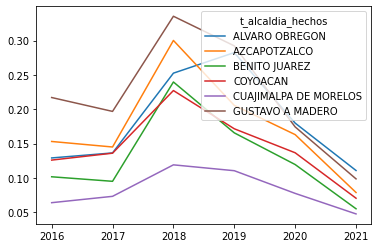

In [107]:
#gráfica del indicador anual
(Indicador.iloc[:,0:6]).plot()

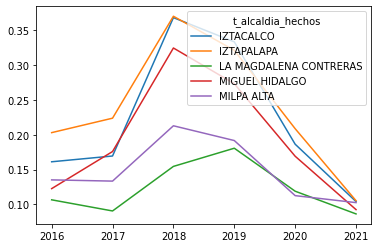

In [108]:
(Indicador.iloc[:,6:11]).plot()

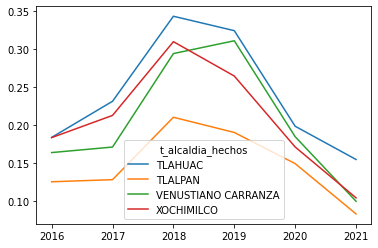

In [109]:
(Indicador.iloc[:,11:17]).plot()